<a href="https://colab.research.google.com/github/RupeshSharma14/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [119]:
# Importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [120]:
# Configuration for matplotlib graphs

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (13, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

In [121]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
# Loading the dataset in pandas 

path = "/content/drive/MyDrive/Bike Sharing Demand Prediction/SeoulBikeData.csv"
bike_df = pd.read_csv(path, encoding = "latin")

In [123]:
# Displaying the dataset

bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [124]:
# Size of the data

bike_df.shape

(8760, 14)

In [125]:
# Check for duplicate data

bike_df.duplicated().sum()

0

In [126]:
# Check for NULL values

bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [127]:
# Check for data types

bike_df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object



> **Date is an object data type. We should convert it into datetime datatype.**



In [128]:
# Converting the data type of "Date" column to datetime object

bike_df["Date"] = bike_df["Date"].astype("datetime64")

In [129]:
# Descriptive summary of the dataset

bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# **Exploratory Data Analysis**

### **Univariate Analysis**

**1. Dependent Variable**

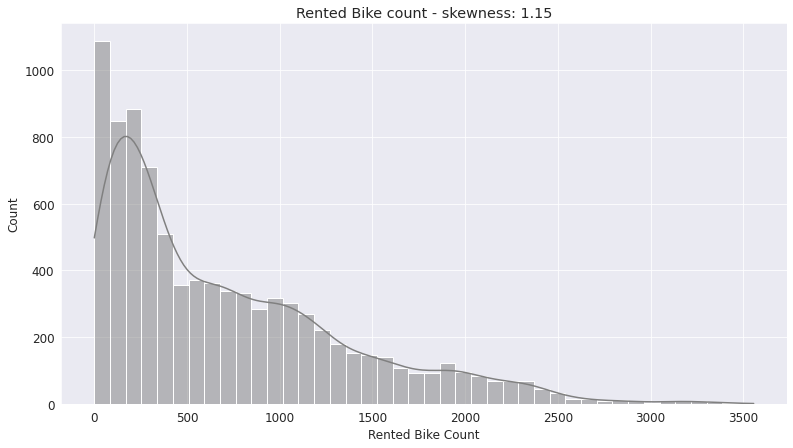

In [130]:
# Distribution of Dependent Variable

sns.histplot(bike_df["Rented Bike Count"], kde = "True", color = "grey")
plt.title("Rented Bike count - skewness: " + str(round(bike_df["Rented Bike Count"].skew(), 2))) 
plt.show()



> **The dependent variable is moderately positive skewed.**



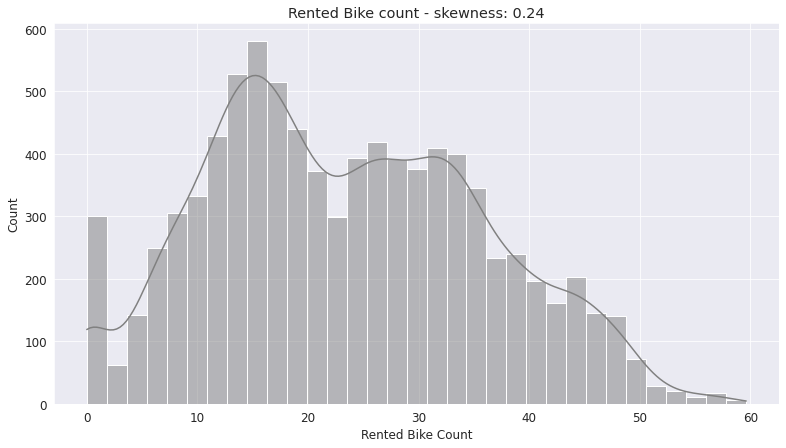

In [131]:
# Distribution of Dependent Variable after transformation

sns.histplot(np.sqrt(bike_df["Rented Bike Count"]), kde = "True", color = "grey")
plt.title("Rented Bike count - skewness: " + str(round(np.sqrt(bike_df["Rented Bike Count"]).skew(), 2))) 
plt.show()

**2. Numerical variables**

In [132]:
numeric_features = bike_df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

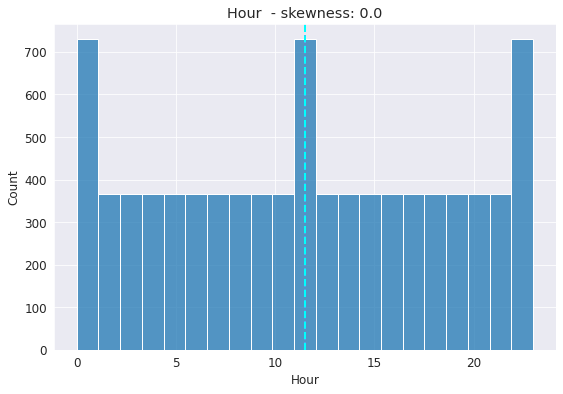

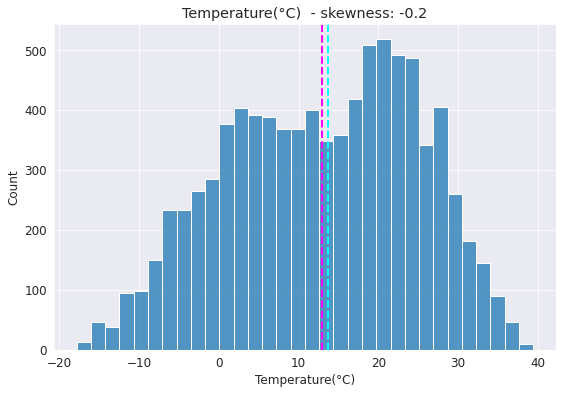

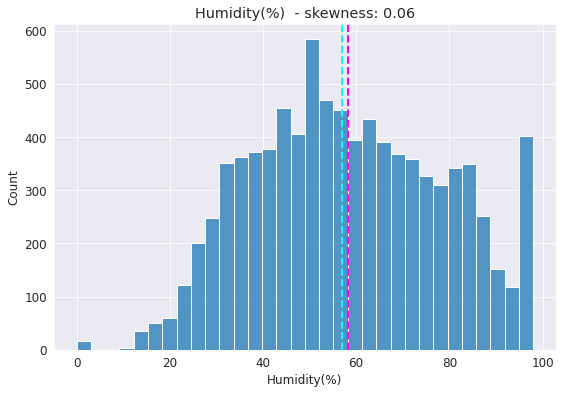

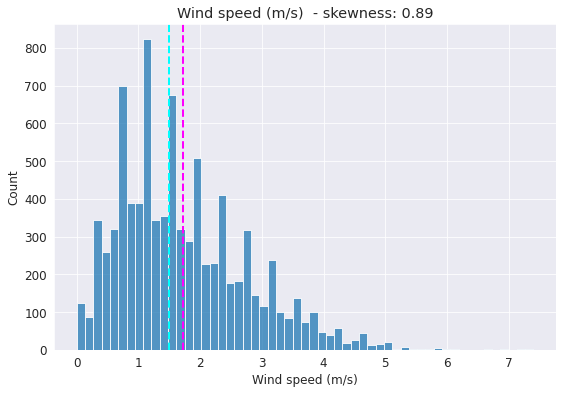

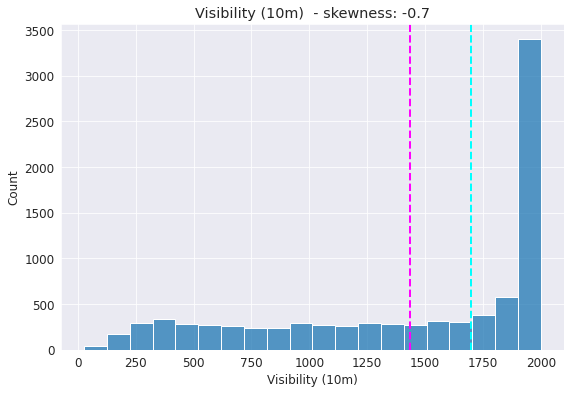

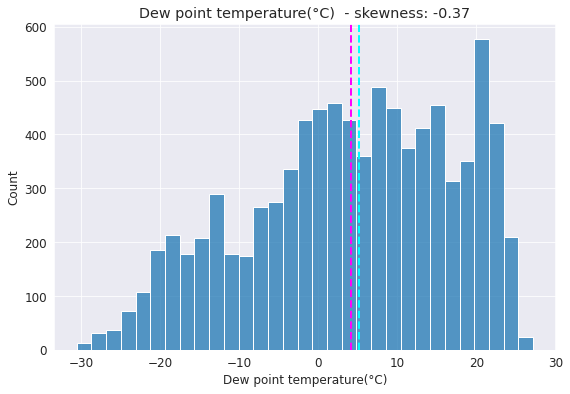

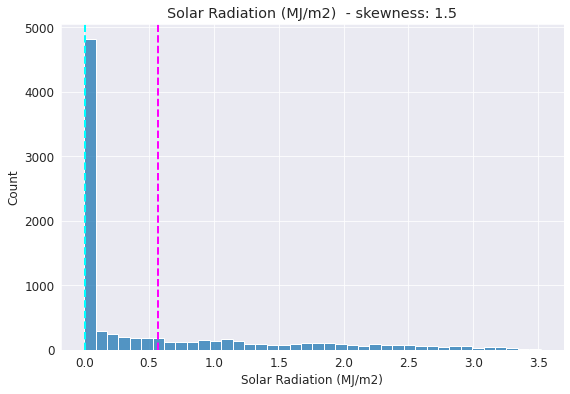

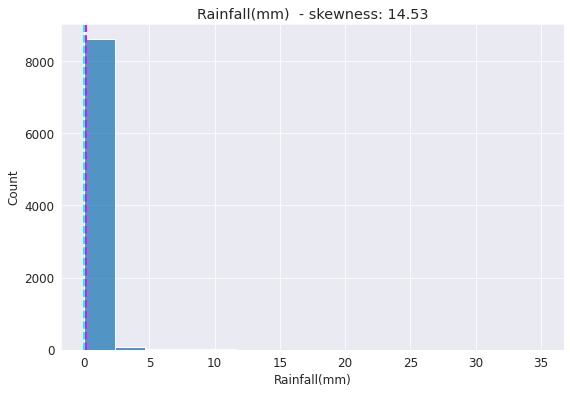

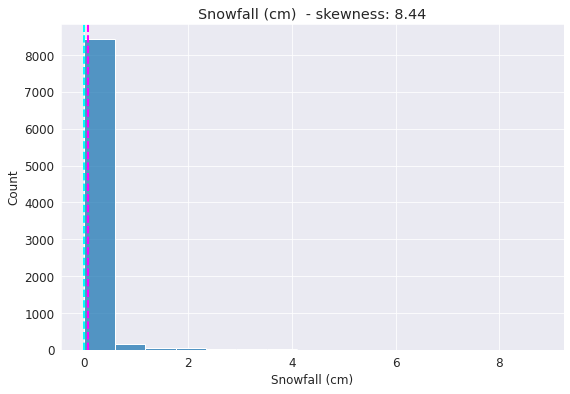

In [133]:
# Distribution of numeric_features

for col in numeric_features[1:]:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  feature = bike_df[col]
  sns.histplot(feature, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col + "  - skewness: " + str(round(feature.skew(), 2))) 

plt.show()



> **Symmetrical Distribution: Hour, Humidity, Temperature, Dew point**


> **Moderately  negative skewed: Visibility**

> **Highly positive skewed: Rainfall, Snowfall, Solar Radiation, Wind Speed**







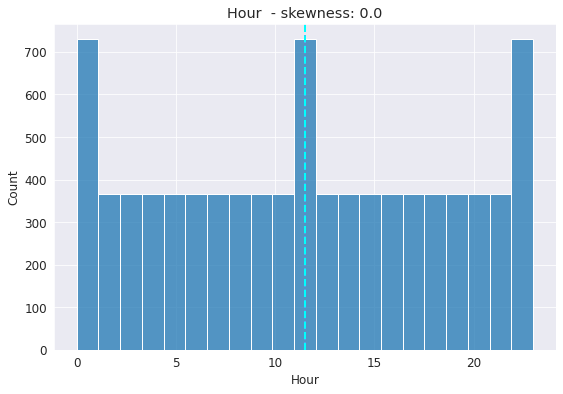

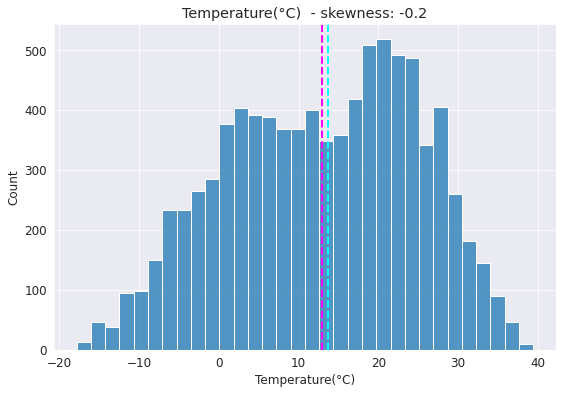

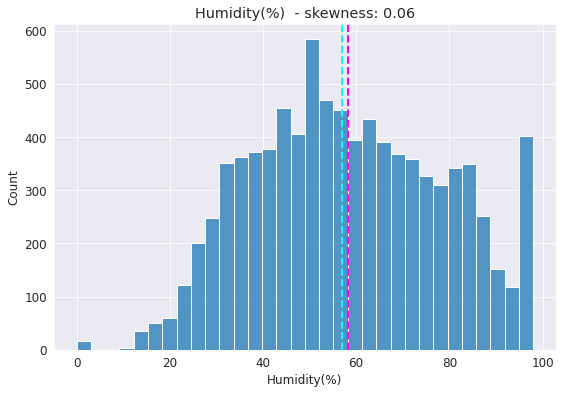

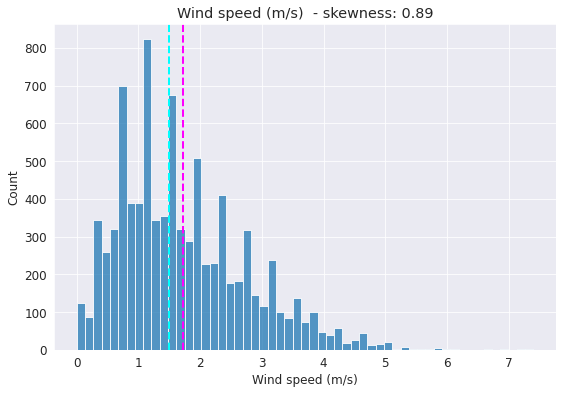

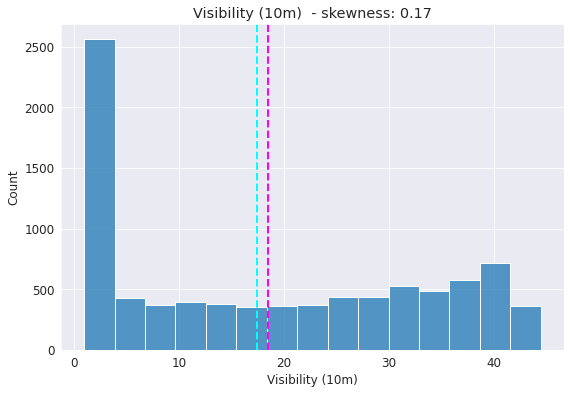

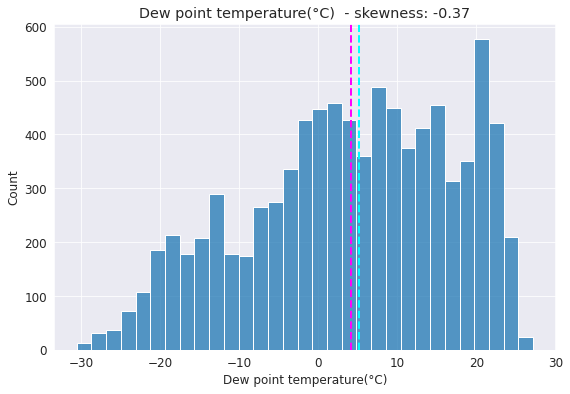

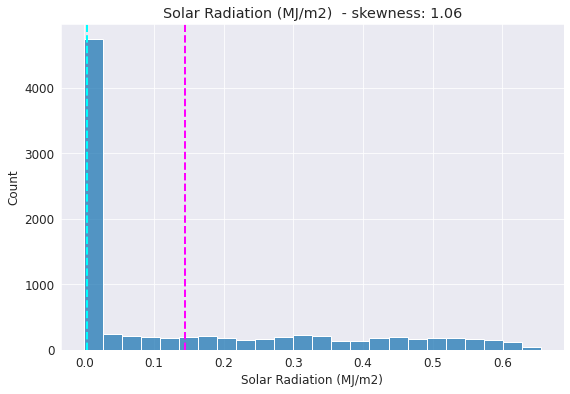

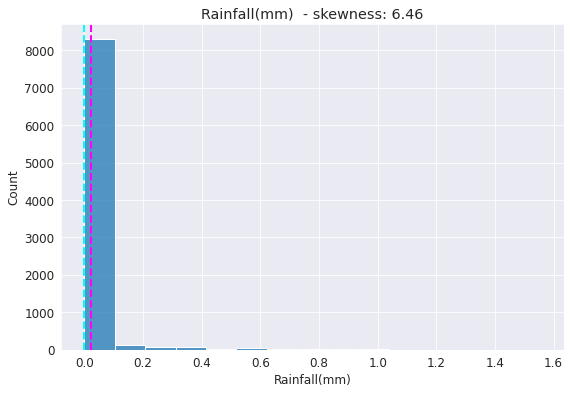

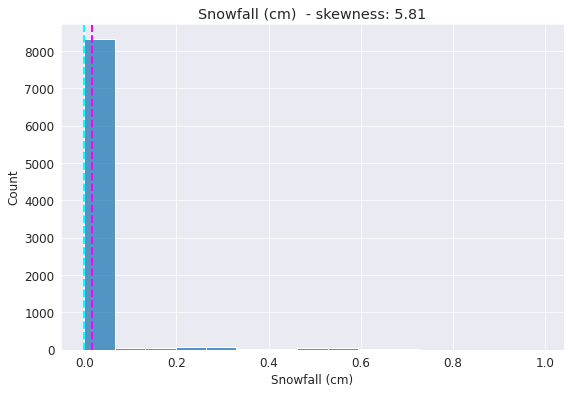

In [134]:
# Transforming distribution of skewed numeric_features

for col in numeric_features[1:]:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  if col == "Visibility (10m)":
    feature = np.sqrt(np.max(bike_df[col] + 1) - bike_df[col]) 
  elif col  in ["Snowfall (cm)", "Rainfall(mm)", "Solar Radiation (MJ/m2)"]:
    feature = np.log10(bike_df[col] + 1)
  else:
    feature = bike_df[col]
  sns.histplot(feature, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col + "  - skewness: " + str(round(feature.skew(), 2))) 

plt.show()

**3. Categorical variables**

In [135]:
# Categorical features

categorical_features = bike_df.describe(include = "object").columns
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

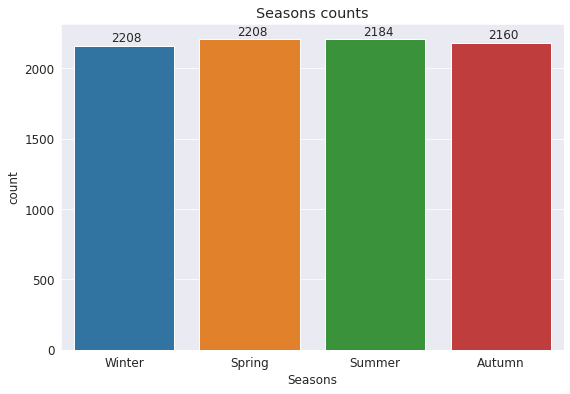

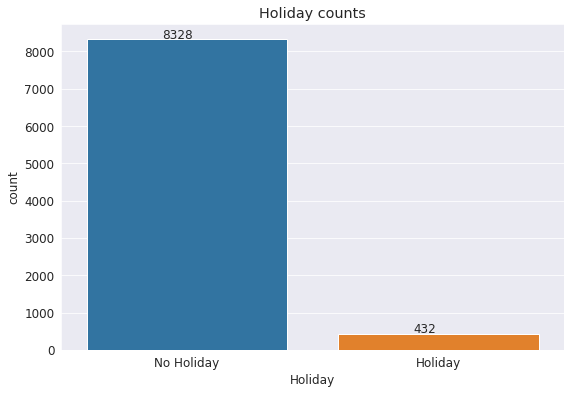

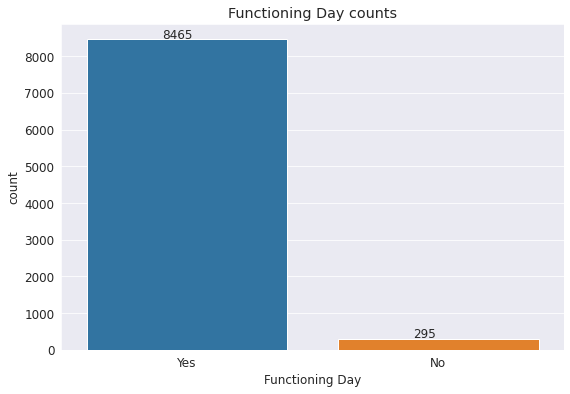

In [136]:
for col in categorical_features:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  feature = bike_df[col]
  ax = sns.countplot(x = feature)
  for p, label in zip(ax.patches, feature.value_counts().values):
    ax.annotate(label, (p.get_x()+0.300, p.get_height()+ 30))
  ax.set_title(col + " counts")

plt.show()

## **Bivariate Analysis**

**1. Numerical variables vs Dependent Variable**

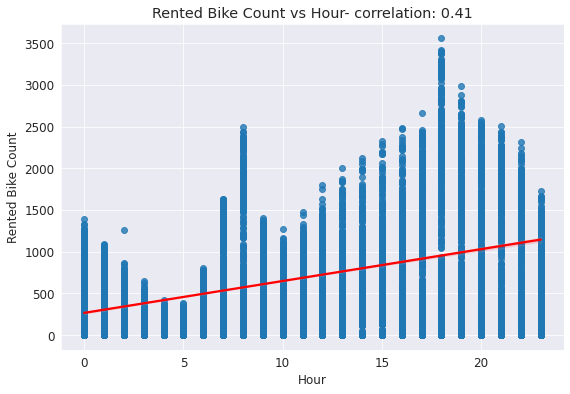

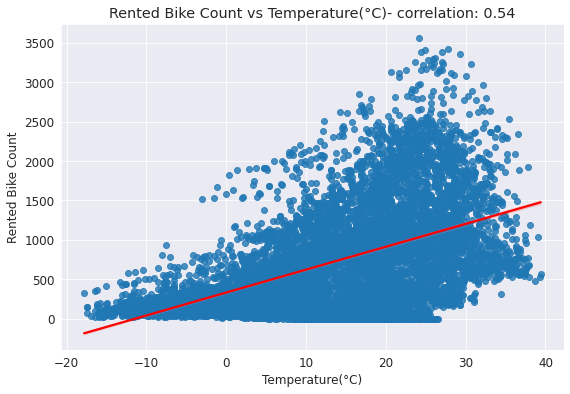

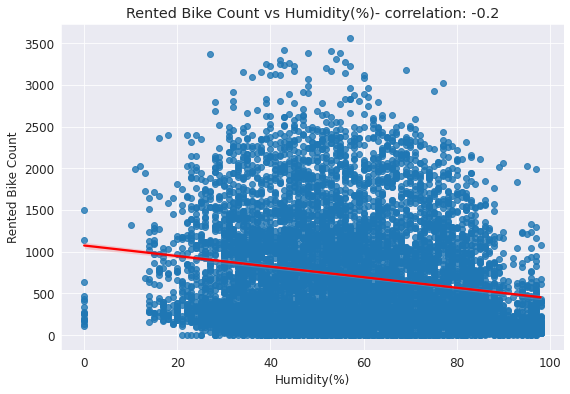

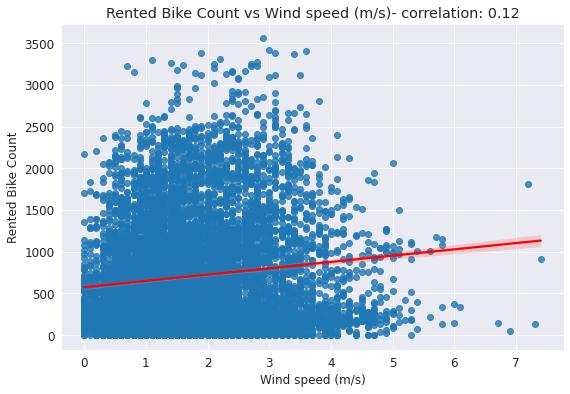

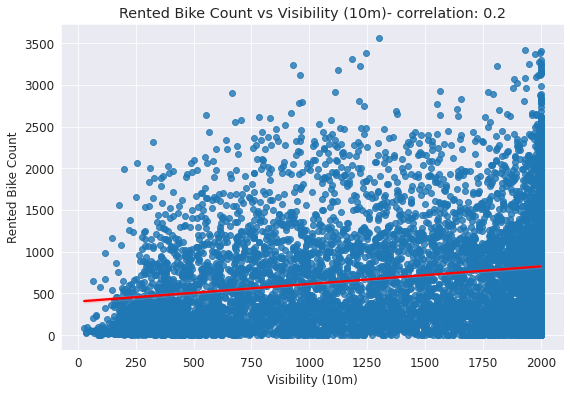

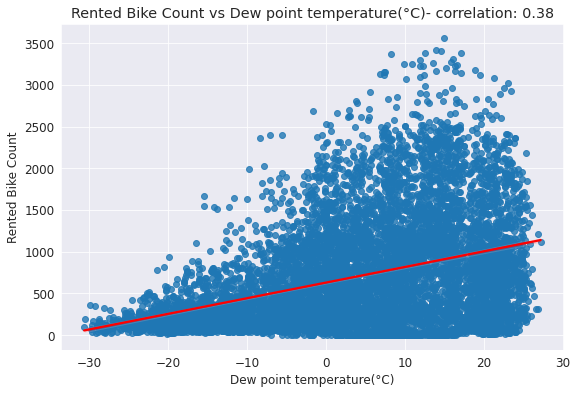

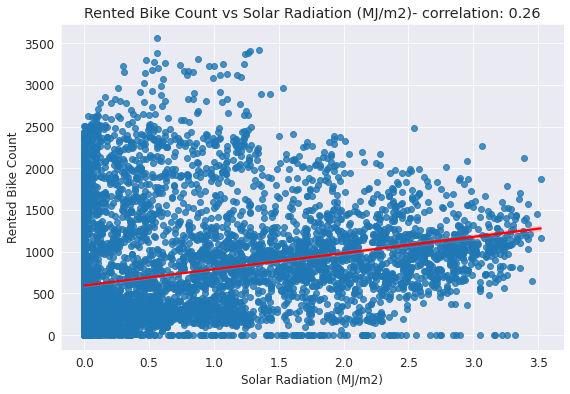

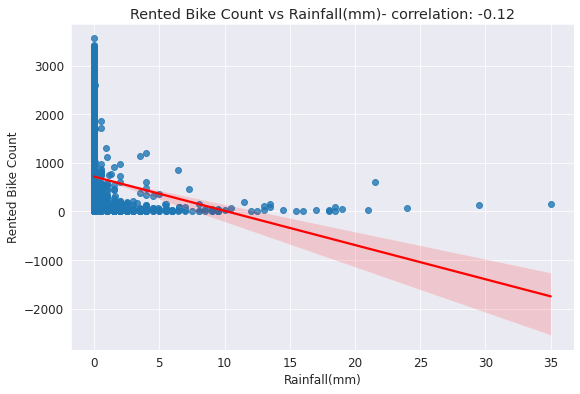

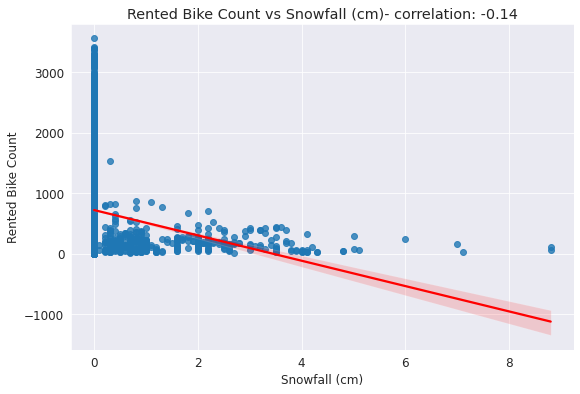

In [137]:
# Check for linear relationship between dependent and numerical independent variables

for col in numeric_features[1:]:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  feature = bike_df[col]
  label = bike_df["Rented Bike Count"]
  correlation = feature.corr(label)
  sns.regplot(x = feature, y = label, line_kws={"color": "red"})
  ax.set_title("Rented Bike Count vs "+ col + "- correlation: " + str(round(correlation, 2)))

plt.show()

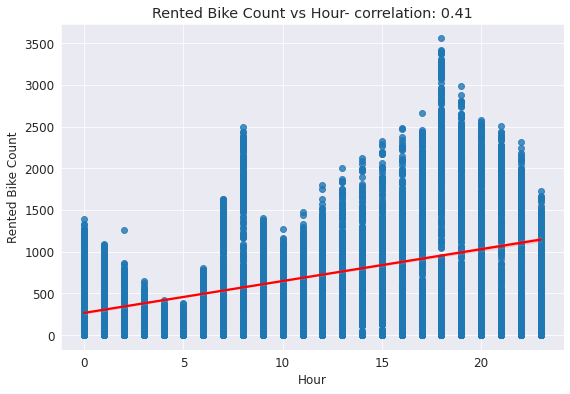

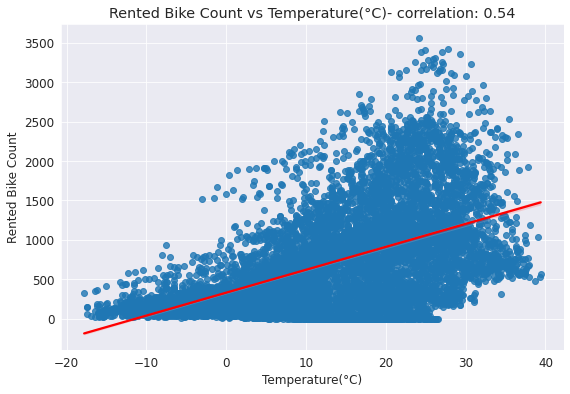

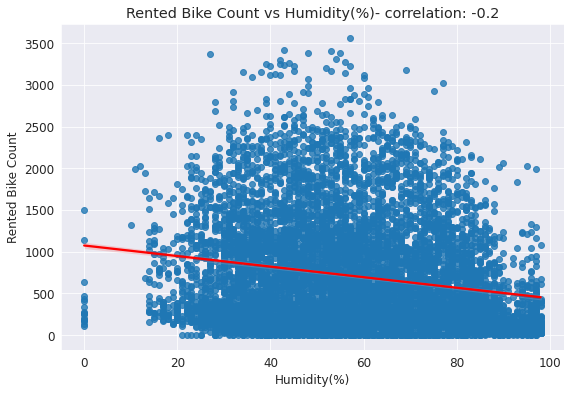

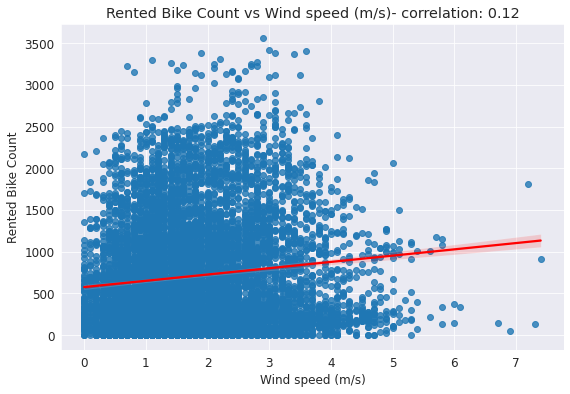

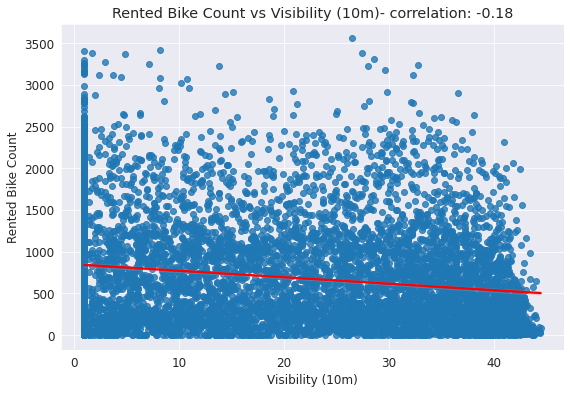

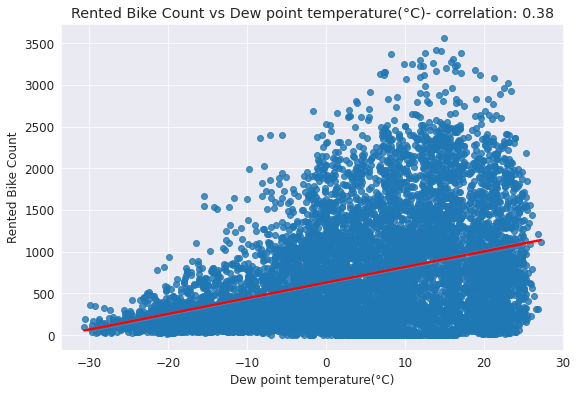

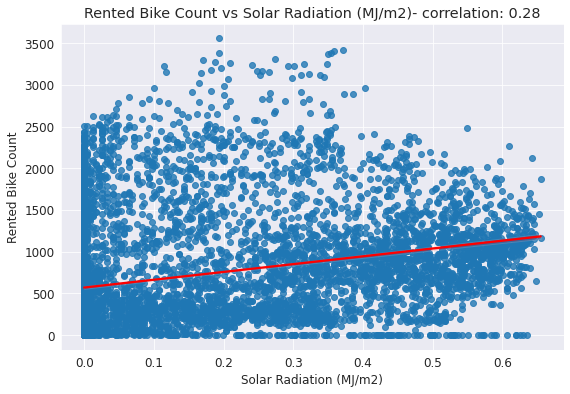

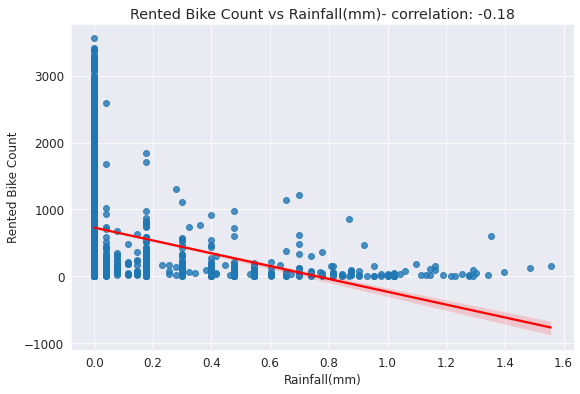

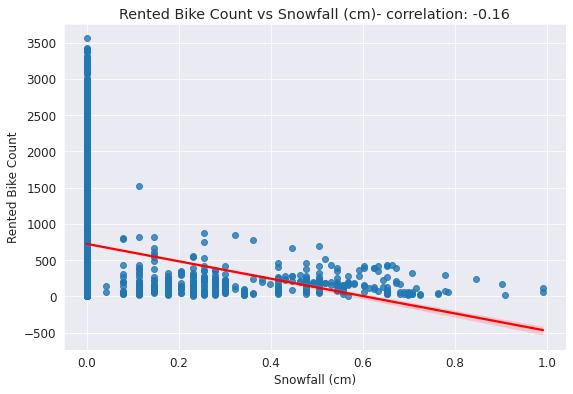

In [138]:
#  Check for linear relationship between dependent and numerical independent variables (after transformation)

for col in numeric_features[1:]:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  label = bike_df["Rented Bike Count"]
  
  if col == "Visibility (10m)":
    feature = np.sqrt(np.max(bike_df[col] + 1) - bike_df[col]) 
  elif col  in ["Snowfall (cm)", "Rainfall(mm)", "Solar Radiation (MJ/m2)"]:
    feature = np.log10(bike_df[col] + 1)
  else:
    feature = bike_df[col]

  correlation = feature.corr(label)

  sns.regplot(x = feature, y = label, line_kws={"color": "red"})
  ax.set_title("Rented Bike Count vs "+ col + "- correlation: " + str(round(correlation, 2)))

plt.show()

**2. Categorical variables vs Dependent variable**



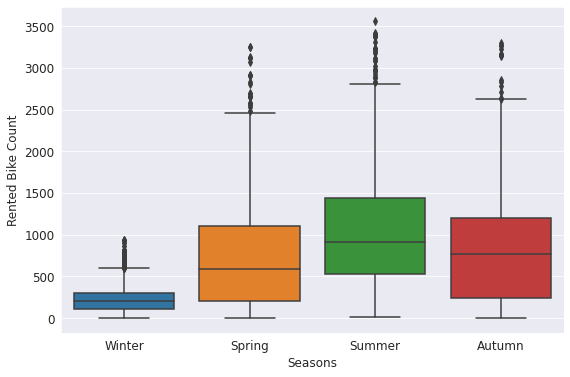

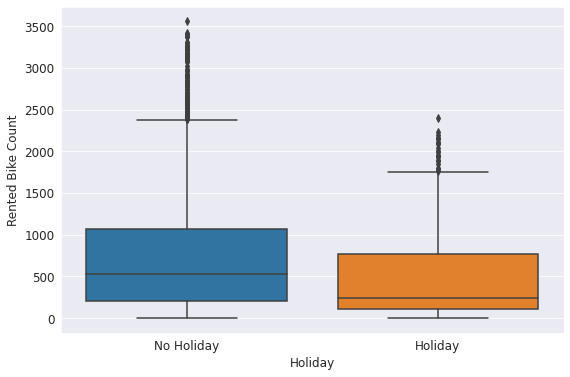

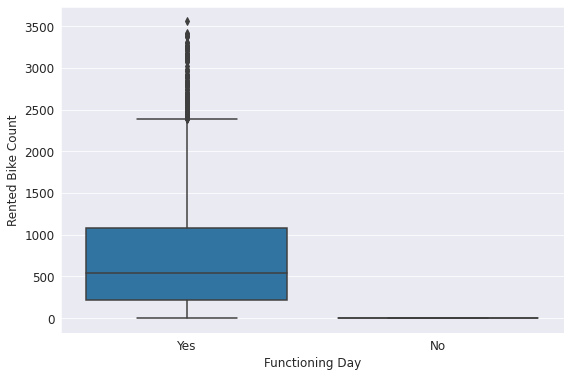

In [139]:
# Check for relation between rented bike count and categorical columns

for col in categorical_features:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  feature = bike_df[col]
  label = bike_df["Rented Bike Count"]
  sns.boxplot(x = feature, y = label)

plt.show()

## **Multivariate Analysis**

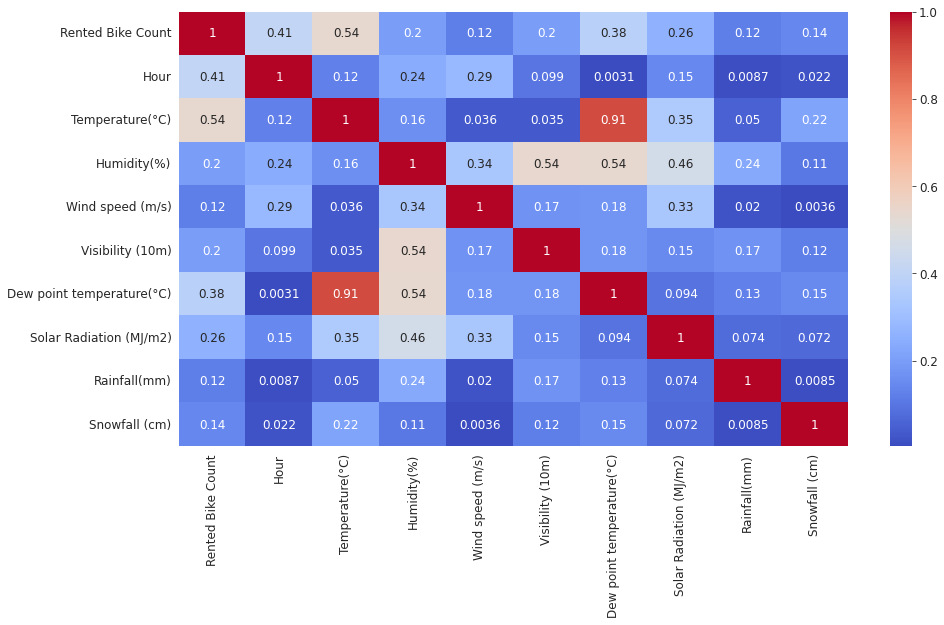

In [140]:
# Correlation matrix

plt.figure(figsize = (15, 8))
correlation = bike_df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = "coolwarm")

plt.show()

# **Data Preparation**

**Removing Multicollinearity**

In [141]:
# Using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
  '''
  Calculating VIF
  '''

  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return vif

In [142]:
cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in ["Rented Bike Count", "Dew point temperature(°C)"]]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


In [143]:
numeric_features = cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in ["Rented Bike Count", "Dew point temperature(°C)"]]])["variables"].values

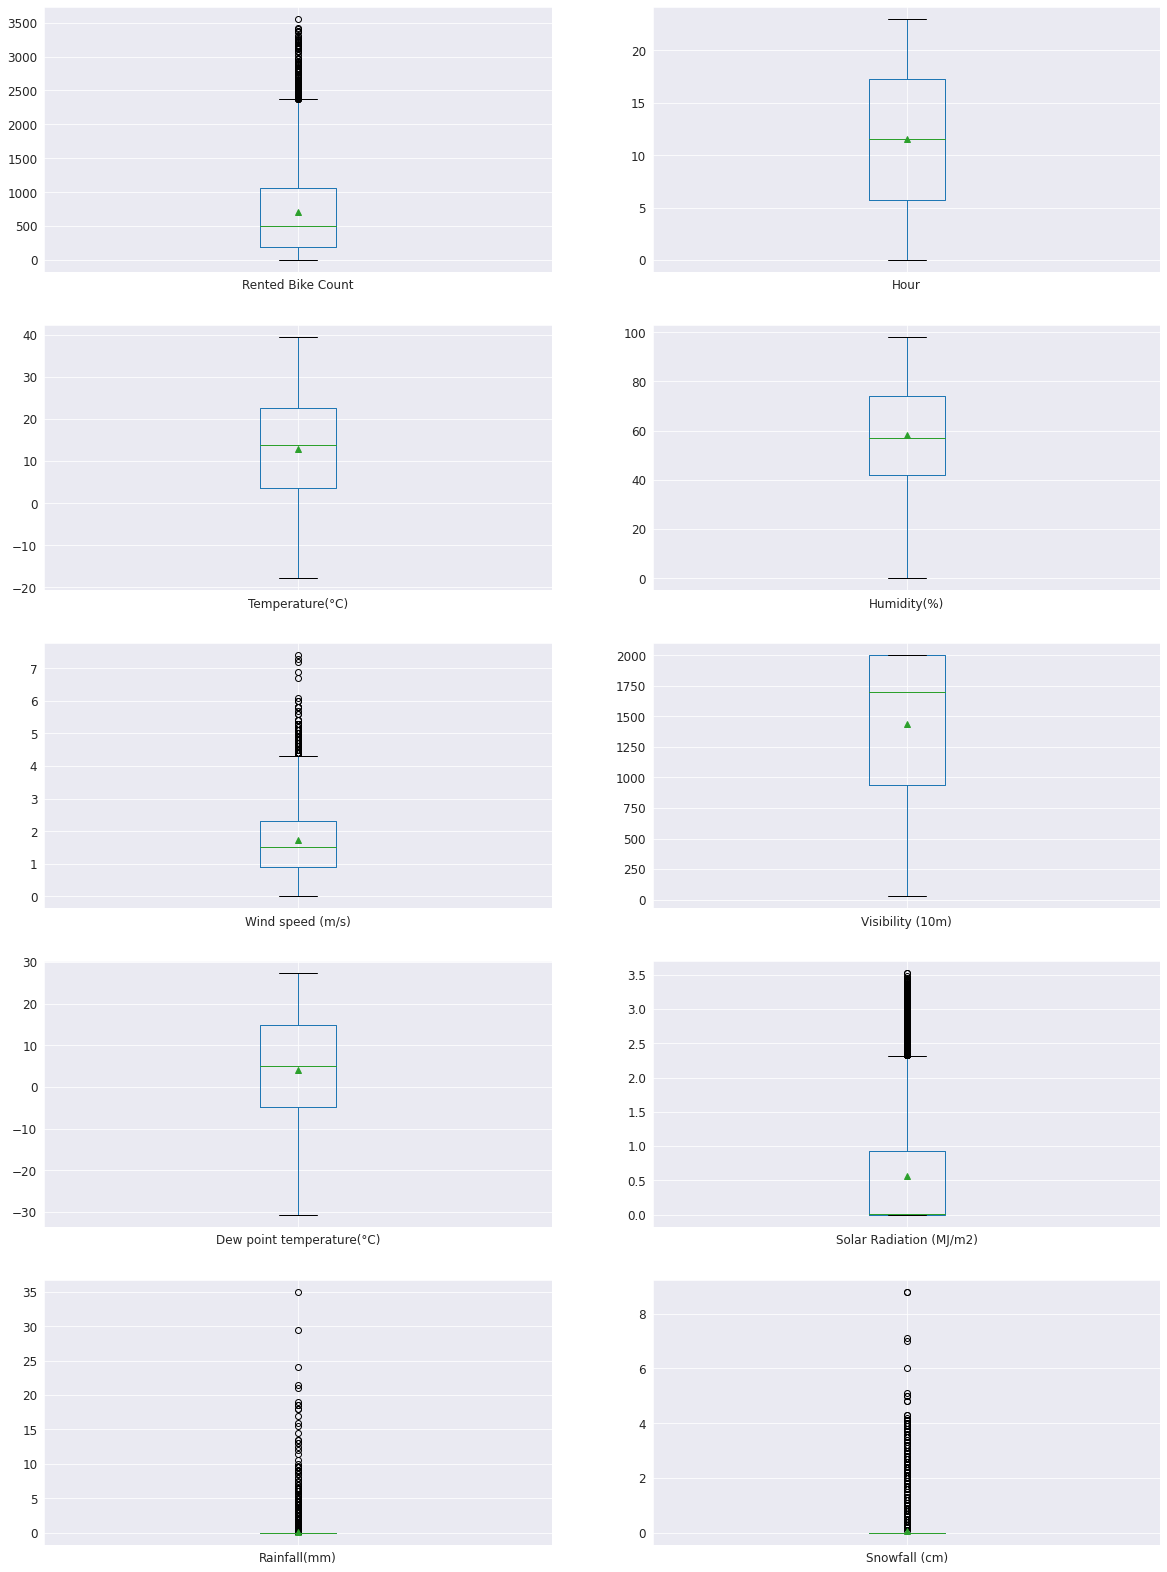

In [144]:

bike_df.plot(kind="box",subplots=True,layout=(7,2), showmeans = True, figsize=(20,40));

In [145]:
432 / 8328 # will drop Functioning column

0.05187319884726225

In [146]:
295/ 8465 # will drop Holiday column

0.03484937979917307

In [147]:
bike_df.shape

(8760, 14)

In [148]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [149]:
bike_df.drop(columns = "Date", inplace = True)

# **Modelling**

In [156]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bike_df, test_size = 0.2, random_state = 42)


In [157]:
from sklearn.model_selection import StratifiedShuffleSplit

splits = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in splits.split(bike_df, bike_df["Seasons"]):
  strat_train_set = bike_df.loc[train_index]
  strat_test_set = bike_df.loc[test_index]

In [160]:
def season_cat_proportions(df):
  return bike_df["Seasons"].value_counts() / len(bike_df)

compare_props = pd.DataFrame({
    "Overall": season_cat_proportions(bike_df),
    "Random": season_cat_proportions(test_set),
    "Stratified": season_cat_proportions(strat_test_set)
}).sort_index()

compare_props["Random % Error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Stratified % Error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [161]:
compare_props

,Overall,Random,Stratified,Random % Error,Stratified % Error
Autumn,0.249315,0.249315,0.249315,0.0,0.0
Spring,0.252055,0.252055,0.252055,0.0,0.0
Summer,0.252055,0.252055,0.252055,0.0,0.0
Winter,0.246575,0.246575,0.246575,0.0,0.0
